## Marketing Analytics

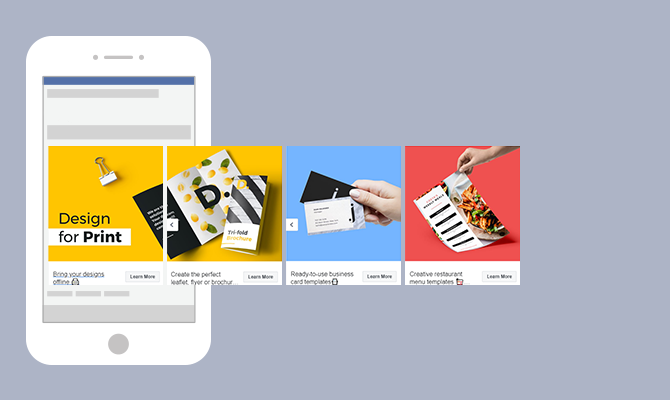

In [1]:
from IPython.display import Image
Image(filename='marketing.png', width=500, height=200)

### Introduction
This notebook will accomplish the following task:

#### Overall goal:
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

#### Section 01: Exploratory Data Analysis

Are there any null values or outliers? How will you wrangle/handle them?
Are there any variables that warrant transformations?
Are there any useful variables that you can create with the given data?
Do you notice any patterns or anomalies in the data? Can you plot them?
Which marketing campaign is most successful?

#### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?
Does US fare significantly better than the Rest of the World in terms of total purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
Is there a significant relationship between geographical regional and success of a campaign?

#### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

What does the average customer look like for this company?
Which products are performing best?

In [2]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# creating the date object of today's date
todays_date = date.today()

In [4]:
df = pd.read_csv('marketing_data.csv')

In [5]:
# Removing white spaces from column names.
df.columns = df.columns.str.replace(' ', '')

In [6]:
# Removing $ sign from Income field.
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [7]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object

In [8]:
# Converting the Dt_Customer field to a datatime.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

### Section 01: Exploratory Data Analysis

#### Are there any null values or outliers? How will you wrangle/handle them?

- Yes there are some null values. There are a 24 null values in the Income field.
- We can handle handle these null values by either dropping rows of data in the other fields so they match up with the income field or we can take take the average income and replace the missing values with that value.
- In this case we'll use the fill in the 24 null values with the median income amount.
- For outliers, we can check for those using a box and whisker plot.

In [9]:
df.describe(include='all')

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [10]:
# Since there are only 24 missing values, we can filling in missing income values with median income amount.
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [11]:
# Below we can see that all the fields have the same number of values.
df.describe(include='all')

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


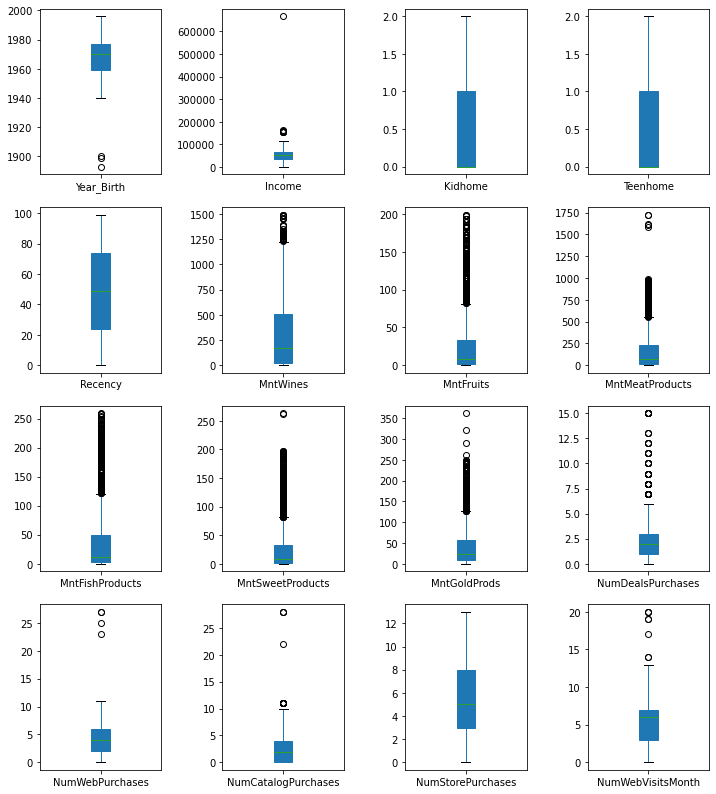

In [12]:
# Checking for outliers in the data using a box and whisker plot.

# Here we're selecting the columns we don't want to check outliers for. 
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# Mapping out the data using a box and whisker plot. 
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

# Below we can see multiple outliers in many of the fields such as Year_Birth, MntMeatProducts and NumWebVisitsMonth.
# Not sure we need to drop any of the outliers as they all seem acceptable.
# Year_Birth seems a little hocking but it's possible for people to live over a 100 years. 
# Income is fine and are the other variables. 

#### Are there any variables that warrant transformations?

- Nothing that I can see at the moment.

#### Are there any useful variables that you can create with the given data?

- Total_Amount_Spent = The total amount that a customer spent on their purchase.
- Total_Purchases = The total number of purchases that a customer made.
- Total_Campaigns_Accepted = The total number of offers a customer accepted.
- Age = The age of the customer.
- Total_Dependents = The total number of dependents a customer has.

In [13]:
# Creating the Total_Amount_Spent field.
df['Total_Amount_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [14]:
# Checking that the Total_Amount_Spent field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Amount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190


In [15]:
# Creating the Total_Amount_Spent field.
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [16]:
# Checking that the Total_Purchases field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Amount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15


In [17]:
# Creating the Total_Campaigns_Accepted field.
df['Total_Campaigns_Accepted'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']

In [18]:
# Checking that the Total_Campaigns_Accepted field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1


In [19]:
# Creating the Age field.
df['Age'] = todays_date.year - df['Year_Birth']

In [20]:
# Checking that the Age field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,51


In [21]:
# Creating the Total_Dependents field.
df['Total_Dependents'] = df['Kidhome'] + df['Teenhome']

In [22]:
# Checking that the Total_Dependents field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Age,Total_Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,51,0


#### Do you notice any patterns or anomalies in the data? Can you plot them?

#### Which marketing campaign is most successful?

It would be the response campaign as 15% of customers accept an offer from that campaign.

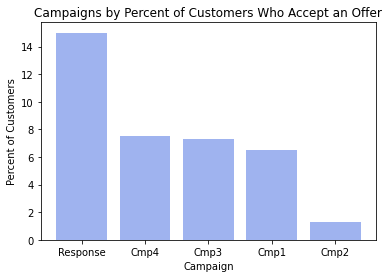

In [23]:
objects = ('Response', 'Cmp4', 'Cmp3', 'Cmp1', 'Cmp2')
y_pos = np.arange(len(objects))
performance = [15,7.5,7.3,6.5,1.3]

plt.bar(y_pos, performance, align='center', alpha=0.5,  color='royalblue')
plt.xticks(y_pos, objects)
plt.xlabel('Campaign')
plt.ylabel('Percent of Customers')
plt.title('Campaigns by Percent of Customers Who Accept an Offer')
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.9)
plt.show()

In [24]:
# Calculating the percent of customers who accepted an offer after the last campaign. Here we can see that it's 15% 
# This is the most successful campaign.
df['Response'].value_counts(normalize=True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [25]:
# Calculating the percent of customers who accepted an offer after the first campaign. Here we can see that it's 6.5%
df['AcceptedCmp1'].value_counts(normalize=True)

0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64

In [26]:
# Calculating the percent of customers who accepted an offer after the second campaign. Here we can see that it's 1.3%
df['AcceptedCmp2'].value_counts(normalize=True)

0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64

In [27]:
# Calculating the percent of customers who accepted an offer after the third campaign. Here we can see that it's 7.3%
df['AcceptedCmp3'].value_counts(normalize=True)

0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64

In [28]:
# Calculating the percent of customers who accepted an offer after the fourth campaign. Here we can see that it's 7.5%
df['AcceptedCmp4'].value_counts(normalize=True)

0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64

### Section 02: Statistical Analysis

#### What factors are significantly related to the number of store purchases?

- To figure this out we'll use a linear regression model by setting the NumStorePurchases field as the target variable. That should help us predict the number of store purchases.

#### Steps to Take 
- Make a copy of the original dataframe.
- Drop irrelavant columns (in this case ID, Dt_Customer, Year_Birth and Age)
- Convert categorical variables to dummy variables.
- Run regression analysis.

In [29]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Age,Total_Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,51,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,2,60,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,0,63,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,0,54,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2,32,1


In [30]:
# Making a copy of the original dataframe.
df2 = df.copy()

In [31]:
# Dropping irrelevant columns.
df2.drop(columns=['ID', 'Dt_Customer', 'Year_Birth', 'Age'], inplace=True)

In [32]:
# Getting categorical features and reviewing the number of unique values.
cat = df2.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

# Below we can see the number of unique categorical variables for the Education, Marital_Status and Country fields.

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


In [33]:
# Using one hot encoder to convert the categorical variables in our dataset to dummy variables.
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

In [34]:
# Merging the dummy variables with the numeric variables in our dataset.
num = df2.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)
df2.head()
# Below we can see that all categorical variables have been mapped with variables.

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Total_Dependents
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,1190,15,1,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,577,18,2,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,251,11,0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,11,4,0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,91,8,2,1


In [50]:
# Isolating the X and y variables and performing a train-test split.
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Linear regression model.
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions.
preds = model.predict(X_test)

# Below we can see that the number of store purchases increases with higher number of total purchases ('TotalPurchases')
# The number of store purchases decreases with higher number of catalog, web, or deals purchases ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases')
# The key take-away is that customers who shop the most in stores are those who shop less via the catalog, website, or special deals

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

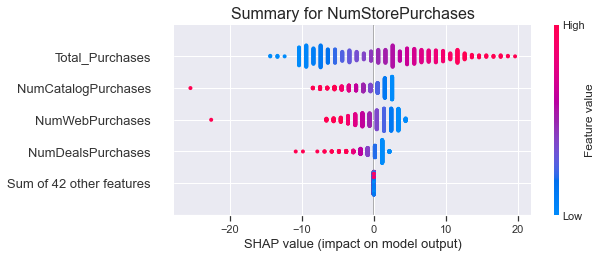

In [51]:
# A visual representation of the findings above.
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)
plt.title('Summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

#### Does US fare significantly better than the Rest of the World in terms of total purchases?

#### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

#### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)


#### Is there a significant relationship between geographical regional and success of a campaign?

### Section 03: Data Visualization

#### What does the average customer look like for this company?

- 52 years old
- Makes around $52,247 a year.
- Has a masters degree or higher.
- Is in a relationship.
- Has 1 child at most; it not any at all.

In [38]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Age,Total_Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,15,1,51,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,577,18,2,60,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,251,11,0,63,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,11,4,0,54,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,91,8,2,32,1


In [49]:
# Average customer is 52 years old. 
df['Age'].mean()

52.19419642857143

In [40]:
# Average customer makes $52,247.25 a year.
df['Income'].mean()

52247.25135379059

In [41]:
# Majority have a masters degree or higher. Meaning they're extremely educated.
df['Education'].value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

Text(0.5, 1.02, 'Percent of People by Education Level')

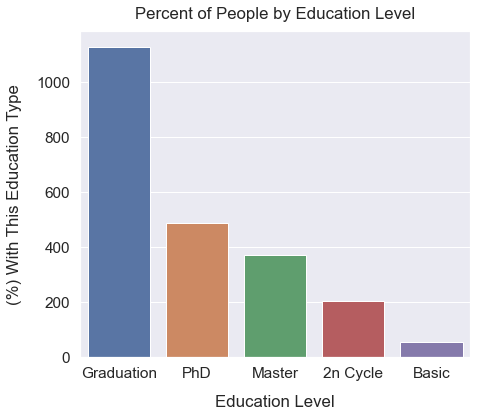

In [63]:
sns.set(font_scale=1.4)
plt.figure(figsize = (7, 6))
sns.countplot(x = df['Education'],
              data = df,
              order = df['Education'].value_counts(normalize=True).index)
plt.xlabel("Education Level", labelpad=14)
plt.ylabel("(%) With This Education Type", labelpad=14)
plt.title("Percent of People by Education Level", y=1.02)

In [43]:
# More than half are seeing someone.
df['Marital_Status'].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

Text(0.5, 1.02, 'Percent of People by Marital Status')

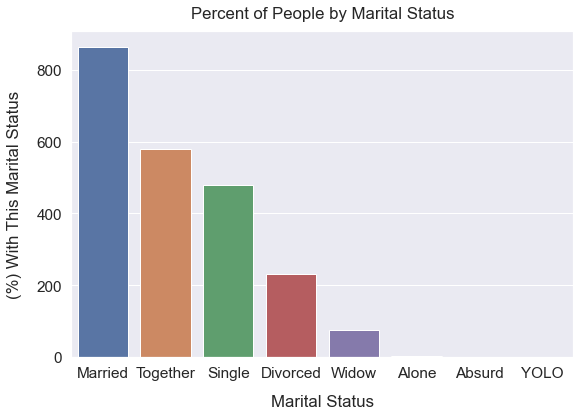

In [69]:
sns.set(font_scale=1.4)
plt.figure(figsize = (9, 6))
sns.countplot(x = df['Marital_Status'],
              data = df,
              order = df['Marital_Status'].value_counts(normalize=True).index)
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("(%) With This Marital Status", labelpad=14)
plt.title("Percent of People by Marital Status", y=1.02)

In [45]:
# Majority don't have children and if they do it's 1 child at most.
df['Kidhome'].value_counts(normalize=True)

0    0.577232
1    0.401339
2    0.021429
Name: Kidhome, dtype: float64

Text(0.5, 1.02, 'Percent of People by Number of Children')

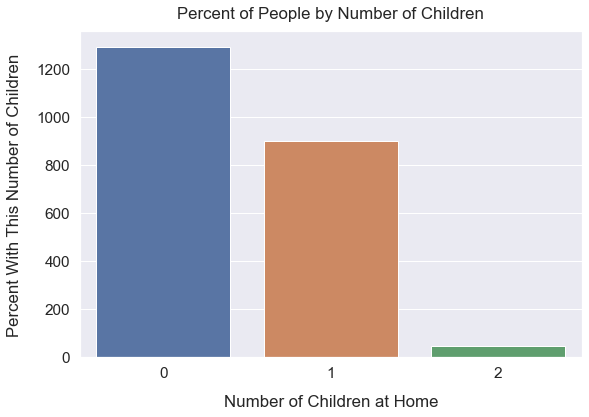

In [70]:
sns.set(font_scale=1.4)
plt.figure(figsize = (9, 6))
sns.countplot(x = df['Kidhome'],
              data = df,
              order = df['Kidhome'].value_counts(normalize=True).index)
plt.xlabel("Number of Children at Home", labelpad=14)
plt.ylabel("Percent With This Number of Children", labelpad=14)
plt.title("Percent of People by Number of Children", y=1.02)

#### Which products are performing best?

- Wines sells the best with customers spending on average $303.93 on wine
- Followed by gold, meat, fish and sweet products.

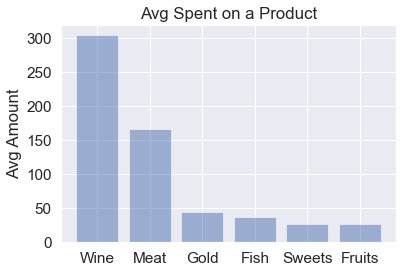

In [47]:
objects = ('Wine', 'Meat', 'Gold', 'Fish', 'Sweets', 'Fruits')
y_pos = np.arange(len(objects))
performance = [303.93, 166.95, 44.02, 37.52, 27.06, 26.30]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Avg Amount')
plt.title('Avg Spent on a Product')

plt.show()

In [48]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Age,Total_Dependents
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,605.798214,14.862054,0.446875,52.194196,0.950446
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,602.249288,7.677173,0.890543,11.984069,0.751803
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,25.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,8.000000,0.000000,44.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,15.000000,0.000000,51.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000,21.000000,1.000000,62.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,44.000000,5.000000,128.000000,3.000000
